In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from progressbar import progressbar
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from keras.utils import to_categorical
import time

TensorFlow 2.x selected.


Using TensorFlow backend.


In [0]:
def plot(training_Accu, testing_Accu):
  # Create count of the number of epochs
  epoch_count = range(1, len(training_Accu) + 1)

  # Visualize loss history
  plt.figure()
  plt.plot(epoch_count, training_Accu, 'r--')
  plt.plot(epoch_count, testing_Accu, 'b-')
  plt.legend(['Training Accuracy', 'Test Accuracy'])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.show()

11493376/11490434 [==============================] - 0s 0us/step


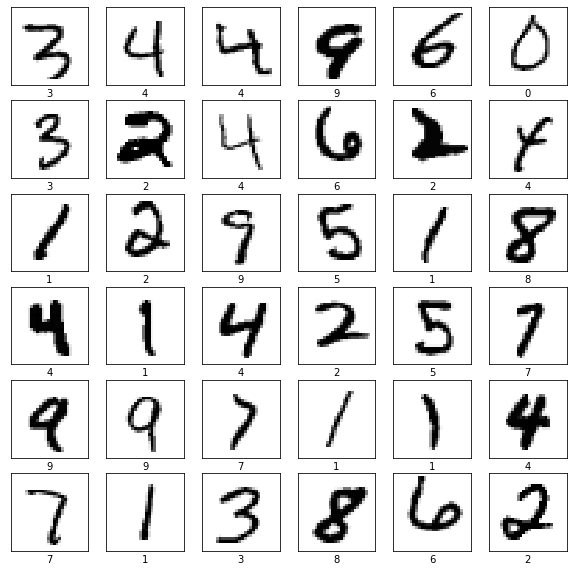

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = np.expand_dims(train_images, axis=-1)/255.
train_labels = np.int64(train_labels)
test_images = np.expand_dims(test_images, axis=-1)/255.
test_labels = np.int64(test_labels)

plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [0]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, input_dim=784, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])
  return fc_model

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2947 - accuracy: 0.9177 - val_loss: 0.1559 - val_accuracy: 0.9564
Epoch 2/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1307 - accuracy: 0.9623 - val_loss: 0.1112 - val_accuracy: 0.9663
Epoch 3/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0918 - accuracy: 0.9730 - val_loss: 0.0925 - val_accuracy: 0.9727
Epoch 4/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0702 - accuracy: 0.9793 - val_loss: 0.0817 - val_accuracy: 0.9752
Epoch 5/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0547 - accuracy: 0.9840 - val_loss: 0.0806 - val_accuracy: 0.9741
--- 15.873881816864014 seconds ---
Test accuracy: 0.9741


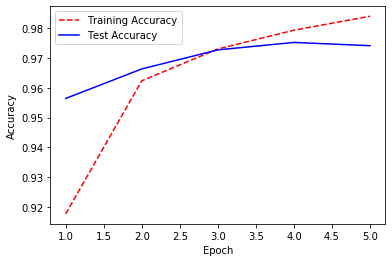

In [0]:
# FC Model

model = build_fc_model()
BATCH_SIZE = 64
EPOCHS = 5
# TODO compile and fit the model with the appropriate parameters.
start_time = time.time()

adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
# If we didn't use one hot encoding
# cnn_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
hist = model.fit(train_images, train_labels, verbose=1, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(test_images, test_labels))
print("--- %s seconds ---" % (time.time() - start_time))

#TODO: Use the evaluate method to test the model.
loss, test_acc = model.evaluate(test_images, test_labels, batch_size=BATCH_SIZE, verbose=0)

print('Test accuracy:', test_acc)
plot(hist.history['accuracy'], hist.history['val_accuracy'])


In [0]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
       tf.keras.layers.Conv2D(24, kernel_size=(5, 5), strides=1, input_shape=(28, 28, 1), activation='relu'),
       tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
       tf.keras.layers.Conv2D(36, kernel_size=(5, 5), strides=1, activation='relu'),
       tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(784, activation='relu'),
       tf.keras.layers.Dropout(0.2),
       tf.keras.layers.Dense(128, activation='relu'),
       tf.keras.layers.Dense(10, activation='softmax')
    ])
    return cnn_model

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 24)        624       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 24)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 24)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 36)          21636     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 36)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 784)              

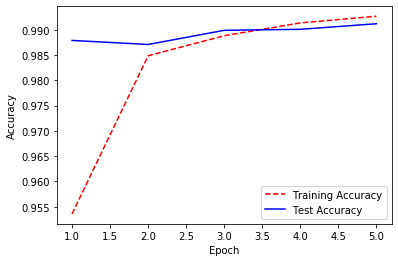

In [0]:
# CNN Model

cnn_model = build_cnn_model()
print(cnn_model.summary())

BATCH_SIZE = 64
EPOCHS = 5
#TODO: Compile and fit the CNN model.
start_time = time.time()

adam = Adam(lr=0.001)
cnn_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
# If we didn't use one hot encoding
# cnn_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
hist = cnn_model.fit(train_images, train_labels, verbose=1, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(test_images, test_labels))
print("--- %s seconds ---" % (time.time() - start_time))

#TODO: Use the evaluate method to test the model.
loss, test_acc = cnn_model.evaluate(test_images, test_labels, batch_size=BATCH_SIZE, verbose=0)

print('Test accuracy:', test_acc)
plot(hist.history['accuracy'], hist.history['val_accuracy'])


In [0]:
predictions = cnn_model.predict(test_images)

predictions[0]

#TODO: identify the digit with the highest confidence prediction for the first image in the test dataset
print(np.argmax(predictions[0]))
print(np.argmax(test_labels[0]))

7
7
